<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/05_Finanzas/01_Inter%C3%A9s/tasas_de_inter%C3%A9s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tasa de interés
### Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME 

*   Autor: 
    - Ocampo Nava Maria Fernanda 

*   Rev: viernes 21 de Mayo 2021 

In [7]:
!git clone https://github.com/jugernaut/Prometeo.git
import os
import Prometeo.Utils.gutils as vis
import math
import matplotlib.pyplot as plt
import matplotlib.patches as pc
from sympy import limit, Symbol, oo
%matplotlib inline

Como ya se expica en el notebook de <a href=https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/05_Finanzas/01_Inter%C3%A9s/Medici%C3%B3n_de_inter%C3%A9s.ipynb>*Medición de interés*</a> en la actualidad cuando se nos presta un bien ajeno ya sea dinero o un bien común es normal que la persona que nos o presta nos cobre renta o en el caso del dinero se nos cobren intereses ya que debe tener una remuneración por el tiempo que no está haciendo uso de este bien.

## **Introducción**
Imagina que una persona te presta dinero y solo te dice que le pagaras una remuneración (interés) cuando se lo devuelvas, pero no te mencio que porcentaje de interes le pagaras, ¿Que arriesgado no?, para esto esta la tasa de interés, que es una medición porcentual de la cantidad que pagaras por el préstamo, suele ser periodica y en ocasiones constante por periodo pero esto no siempre se cumple.

## Tasa nominal de interés

Para aquellos casos en que el interés se paga con frecuencia distinta al periodo para el cuál está calculada la tasa de interés se utilizan las tasas nominales, en otras palabras la tasa nominal es el interés que capitaliza más de una vez por periodo.

Regularmente se denota por $i^{(m)}$ y se tiene una equivalencia con la tasa de interés efectiva  que es:

$$ \begin{equation}
i=(1+\frac{ i^{(m)}}{m})^{m}-1
\end{equation}$$
por lo que 
$$ \begin{equation}
i^{(m)}=m*[(1+i)^{\frac{1}{m}} -1 ]
\end{equation}$$

In [2]:



#con está función obtendremos Si nos dan una tasa de interés i y queremos la tasa nóminal pagadera 
#definimos la función y los parámetros que se necesitan
def nom(i,m):
  #pedimos que nos imprima el valor del monto de acuerdo a los parámetros que proporcionamos
  return m*((1+i)**(1/m)-1)

In [3]:
nom(.12,2)

0.11660104885167266

## Fuerza de descuento
si $m \to \infty$ se tiene una medida de la intensidad de acumulación de intereses, esto es conocido como la fuerza de interés.

Está fuerza de interés está ligada a la variación infinitesimal de $A(t)$ y está definida por:


$$\begin{equation}
\delta_t =  \frac{A^{'}(t)}{ A(t)}
\end{equation}$$
es decir 
$$\begin{equation}
\delta_t =  \frac{d}{ dt} ln(A(t))
\end{equation}$$

$$\begin{equation}
=\int_{0}^{t} \frac{d}{ dr} ln(A(r))
\end{equation}$$

$$\begin{equation}
=\ln(A(t))-ln(A(0))
\end{equation}$$

$$\begin{equation}
=ln(\frac{A(t)}{ A(0)})
\end{equation}$$

De lo anterior tenemos que:

$$\begin{equation}
 \frac{A(t)}{ A(0) }= e ^{\int_{0}^{t} \delta_r dr} = A(t)
\end{equation}$$

De manera similar se obtiene la cantidad de intereses ganaos entre 0 y n, que queda como:

$$\begin{equation}
A(n)-A(0)
\end{equation}$$

##Tasas equivalentes 

Se dice que dos tasas son equivalentes $\Leftrightarrow $ una cantidad C invertida e mismo plazo T genera el mismo  saldo S en t=T.

Lo anterior nos permite comparar una tasa simple vs una nominal, etc.

##Factor de descuento

El factor de descuento (a valor presente) a la tasa de interés $i$ se define como:


$$\begin{equation}
v_i=(1+i)^{-t}
\end{equation}$$

In [8]:
#está función nos va a permitir  sacar el valor presente dando la tasa de interés y el tiempo
# es importante tomar en cuenta que la tasa de interés debe ir acorde a los peridos

def vd(i,t):
  #pedimos que nos imprima el valor del monto de acuerdo a los parámetros que proporcionamos
  return (1+i)**(-t)

In [9]:
vd(.30,6)

0.20717621103300332

Si ahorita nuestro padre nos dio $\$10,000$ y sabemos que hace 3 años el invirtió cierta cantidad a una tasa anual del 30\%, ¿Que cantidad invirtió?

In [16]:
#primero sacamos el factor de descuento
vd(.30,3)
#una vez que tenemos el factor de descuento lo multiplicamos por los 10,000 para obtener su valor hace 3 años
10000*vd(.30,3)

4551.661356395083

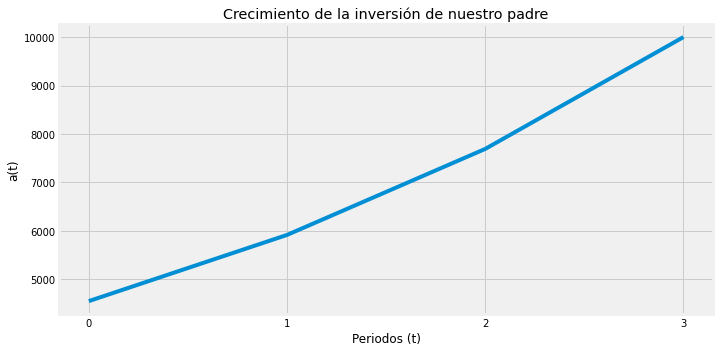

In [17]:
# lista que contiene el número de periodos en orden ascendente
periodos  = [ 0, 1, 2, 3] 
# lista que contiene el valor de la función de de acumulación del interés simple
# conforme al periodo
a = [ 4551.661356,5917.159763313609,7692.3076923076915, 10000  ]

# parámetros que contendrá la próxima gráfica que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Crecimiento de la inversión de nuestro padre', 
        'xlabel':'Periodos (t)',
        'ylabel':'a(t)'}]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos la función
graf.plot(x=periodos, y=a)
# las etiquetas del eje x van a ser los número de cada semana
graf.ticks(xticks = periodos)
# mostramos la figura que contiene la gráfica
graf.show()

##Factor de acumulación

El factor de acumulación (a valor futuro) a la tasa de interés $i$ se define como:


$$\begin{equation}
v_i=(1+i)^{t}
\end{equation}$$

Con este podemos obtener el valor futuro del dinero, es importante tener en cuenta que la periodicidad de la tasa debe coincidir con lo periodos.

Si ahorita tenemos $\$1,000$ y queremos invertirlos a una tasa del 40\% anual, ¿Cuanto dinero tendremos en 5 años?

In [19]:
#está función nos va a permitir  sacar el valor futuro dando la tasa de interés y el tiempo
# es importante tomar en cuenta que la tasa de interés debe ir acorde a los peridos

def vf(i,t):
  #pedimos que nos imprima el valor del monto de acuerdo a los parámetros que proporcionamos
  return (1+i)**(t)

In [27]:
vf(.4,5)*1000


5378.239999999998

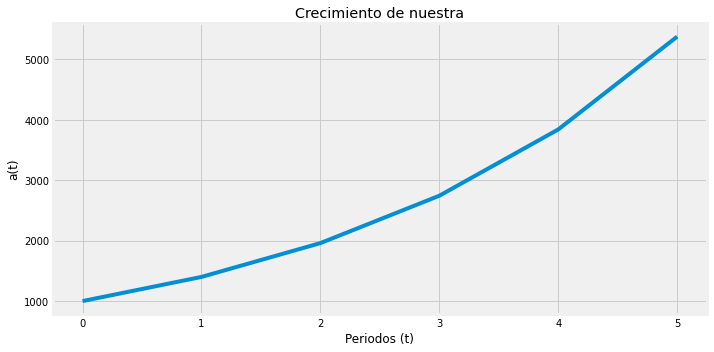

In [29]:
# lista que contiene el número de periodos en orden ascendente
periodos  = [ 0, 1, 2, 3,4,5] 
# lista que contiene el valor de la función de de acumulación del interés simple
# conforme al periodo
a = [ 1000,1400,1959.99999, 2743.99999,3841.5999999999995,5378.239999999998 ]

# parámetros que contendrá la próxima gráfica que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Crecimiento de nuestra', 
        'xlabel':'Periodos (t)',
        'ylabel':'a(t)'}]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos la función
graf.plot(x=periodos, y=a)
# las etiquetas del eje x van a ser los número de cada semana
graf.ticks(xticks = periodos)
# mostramos la figura que contiene la gráfica
graf.show()

##Tasa real de interés

Representa la tasa a la cuál se generarón utilidades descontandole el efecto inflacionario.
Dicho lo anterior tenemos 


$$\begin{equation}
1+i= (1+ i ')(1+r)
\end{equation}$$

de donde 

$i$: tasa nominal de interés

$i '$: tasa real de interés

$r$ : inflación al plazo de nuestra inversión

De donde se deduce que 

$$\begin{equation}
 i '= \frac{i-r}{1+r}
\end{equation}$$

A mayor inflación mi tasa real de interés será más pequeña, incluso puede llegar a ser negativa.

##Aplicaciones

###ejemplo 1 

Si el día de hoy tengo $\$100$ y una tasa de interés capitalizable bimestralmente del 12\% ¿Cuál será el monto final en 10 años?

$$ \begin{equation}
MF=100*(1+\frac{ i^{(6)}}{6})^{6*10}= 328.10
\end{equation}$$

###ejemplo 2

Si al final de 10 años tengo $\$1000$ y una tasa de interés capitalizable bimestralmente del 12\% ¿Cuál será el monto depositado el día de hoy?

$$ \begin{equation}
MF=x*(1+\frac{ i^{(6)}}{6})^{-6*10}= 30.4
\end{equation}$$

###ejercicio para el lector

El dá de hoy José pide un préstamo de $\$10,000$ a Javier firmando un pagaré a 2 años con interés compuesto del 25\% efectivo anual sin embargo, 1.5 años después de haber solicitado dicho préstamo Javier necesita dinero y le vende el pagaré a Gustavo, quien lo va a mantener hasta que venza y a cambio obtiene una tasa de rendimiento simple del 28\% sobre el tiempo que lo tuvo.
¿Cuál es la tasa de rendimiento compuesto tanto anual como efectivo que obtuvo Javier por el tiempo que mantuvo el pagaré? 

Respuestas:


$$ \begin{equation}
i^{(anual)}=14.22\%
\end{equation}$$


$$ \begin{equation}
i^{(efectiva)}=22.07\%
\end{equation}$$

## Referencias

* Adam Siade, J. Apuntes electrónicos de matemáticas financieras. 
* Gutierrez J, Gerardo. Apuntes  de matemáticas financieras.
* Díaz M, Alfredo.(Cuarta Edición).Matemáticas Financieras